## Assignment 1: Machine Learning Methods

### \<your name> \<your id>

#### How can we use health measurements to predict obesity
The dataset provided has two forms of direct/indirect obesity measures. The first is a categorisation (NObeyesdad). 
NObesity values are:
- Underweight Less than 18.5
- Normal 18.5 to 24.9
- Overweight 25.0 to 29.9
- Obesity I 30.0 to 34.9
- Obesity II 35.0 to 39.9
- Obesity III Higher than 40

The second can be done directly via Body Mass Index (BMI) which can be derived from height and weight (use your magical Google skills to find the formula).

The goal here is to do some data modelling to achieve the following:
- What recommendations would you make to the public to reduce the rate of obesity (backed by evidence)?

#### Metric Descriptions

Other provided metrics include:
Gender, Age

The attributes related with eating habits are: 
- Frequent consumption of high caloric food (FAVC)
- Frequency of consumption of vegetables (FCVC)
- Number of main meals (NCP)
- Consumption of food between meals (CAEC)
- Consumption of water daily (CH20)
- Consumption of alcohol (CALC).

The attributes related with the physical condition are: 
- Calories consumption monitoring (SCC)
- Physical activity frequency (FAF)
- Time using technology devices (TUE)
- Transportation used (MTRANS)

### 1. Read the dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("ObesityDataSet.csv")



 Read the data set

### 2. Analyse and visualise the data

In [3]:

data.dropna(axis=0, inplace=True)
data.fillna(data.mean(numeric_only=True), inplace=True)
data.interpolate(inplace=True)





1.Deletes rows that contain missing values
2.Fill in the missing values using the average of each column
3.Fill in missing values using interpolation methods

In [4]:

numeric_data = data.select_dtypes(include=['int', 'float'])
numeric_data += 1e-6  
log_numeric_data = np.log(numeric_data)


In general, the purpose of this code is to convert the data from a numeric column into a logarithmic space, which in some cases may help improve the distribution of the data, such as making the data closer to a normal distribution.



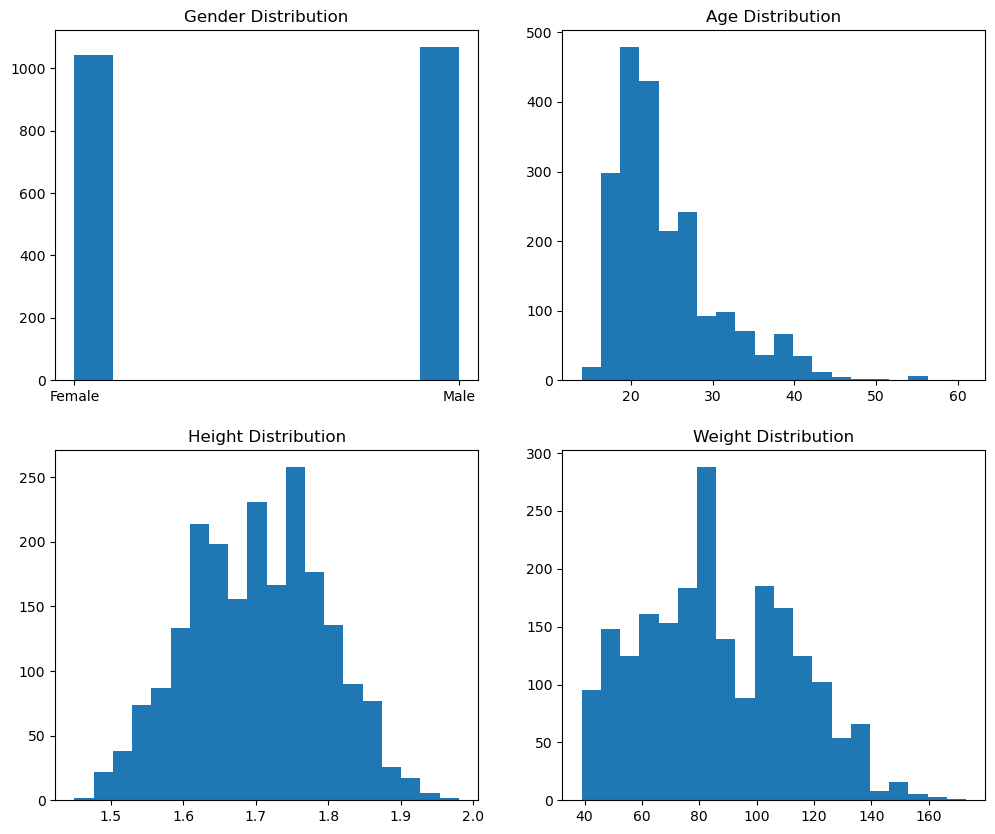

In [5]:

gender = data['Gender']
age = data['Age']
height = data['Height']
weight = data['Weight']


fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].hist(gender)
axs[0, 0].set_title('Gender Distribution')
axs[0, 1].hist(age, bins=20)
axs[0, 1].set_title('Age Distribution')
axs[1, 0].hist(height, bins=20)
axs[1, 0].set_title('Height Distribution')
axs[1, 1].hist(weight, bins=20)
axs[1, 1].set_title('Weight Distribution')

plt.show()




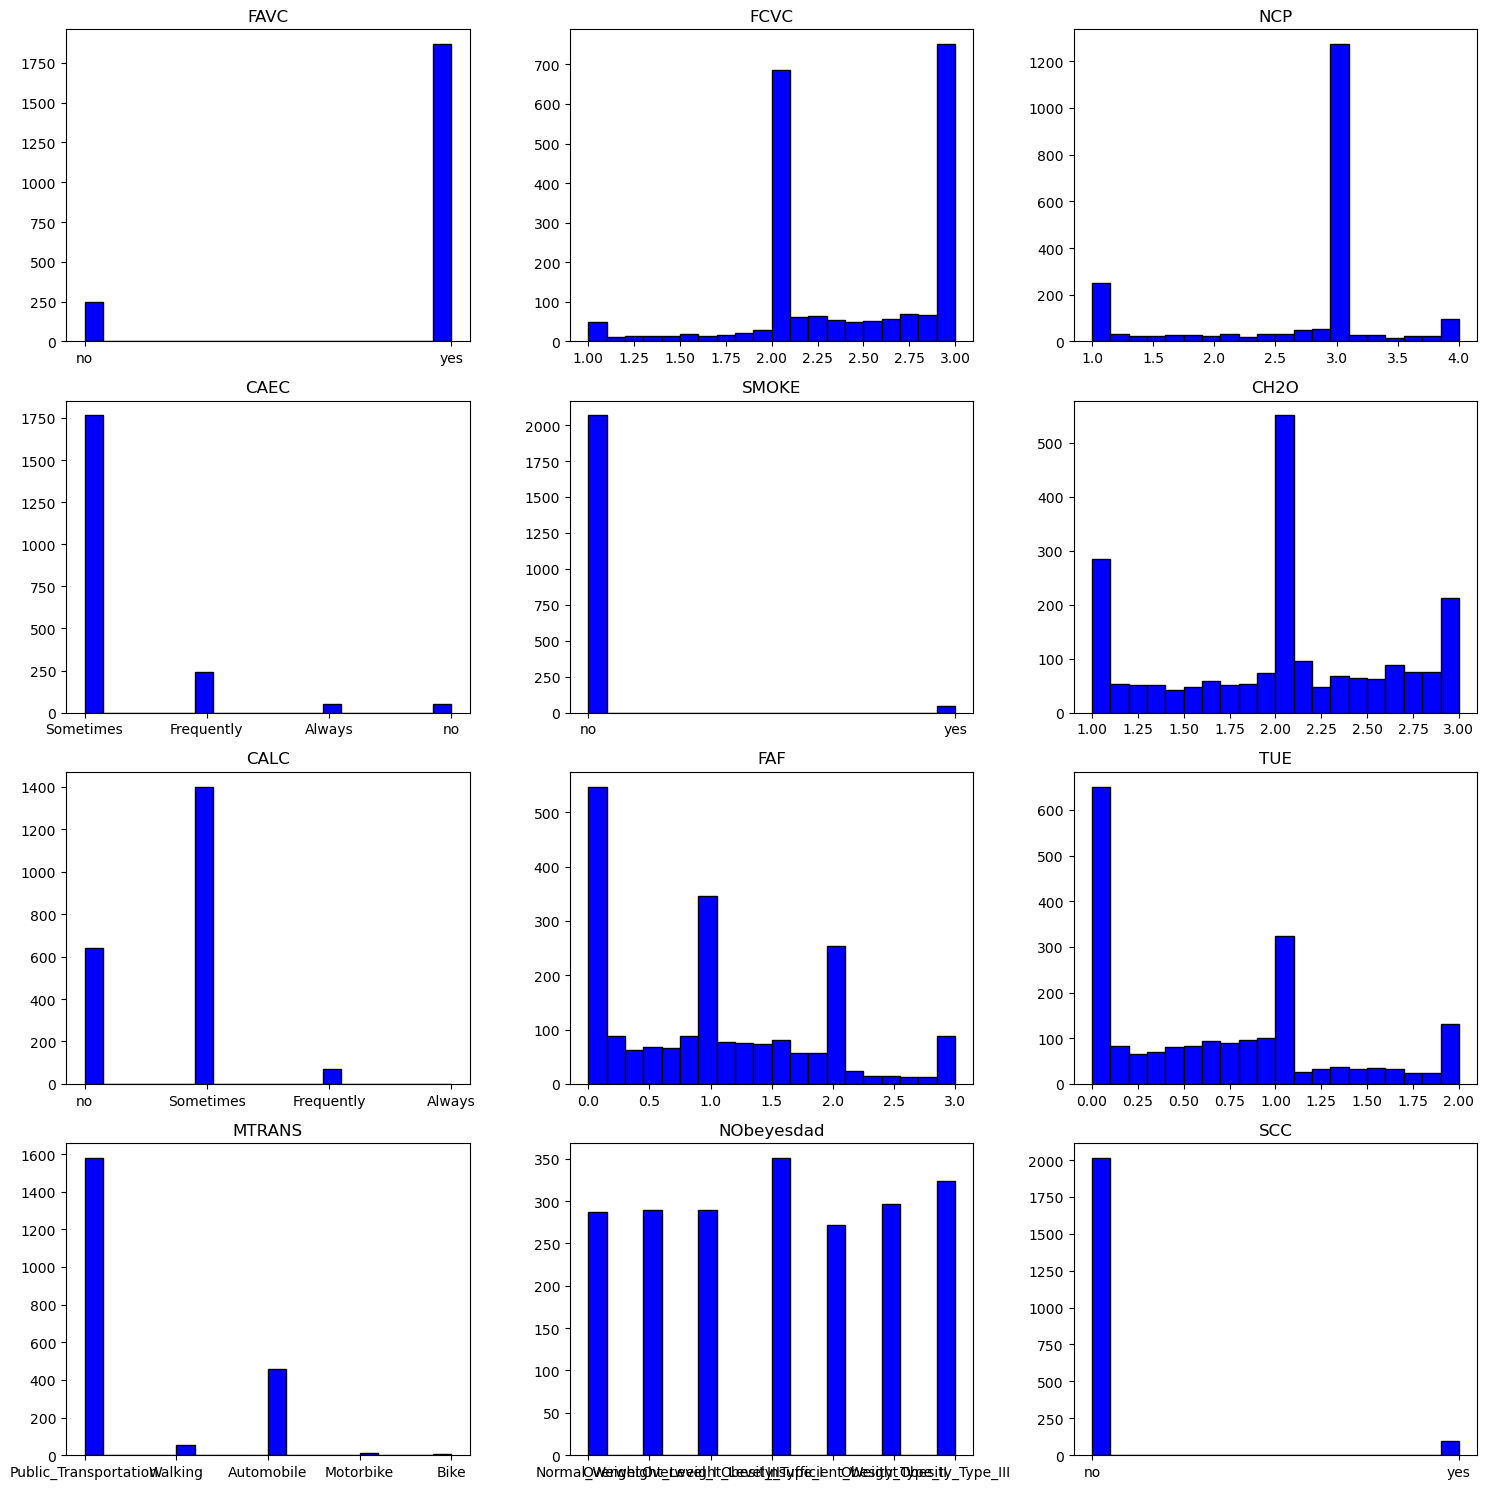

In [6]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15))
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'CALC', 'FAF', 'TUE', 'MTRANS', 'NObeyesdad', 'SCC']
for i, ax in enumerate(axes.flat):
    ax.hist(data[features[i]], bins=20, color='blue', edgecolor='black')
    ax.set_title(features[i])
plt.tight_layout()
plt.show()



Statistics data in excel.

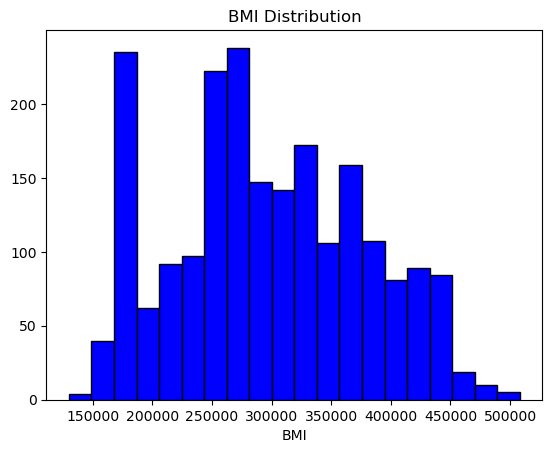

In [7]:
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)
plt.hist(data['BMI'], bins=20, color='blue', edgecolor='black')
plt.xlabel('BMI')
plt.title('BMI Distribution')
plt.show()


bmi calculation result

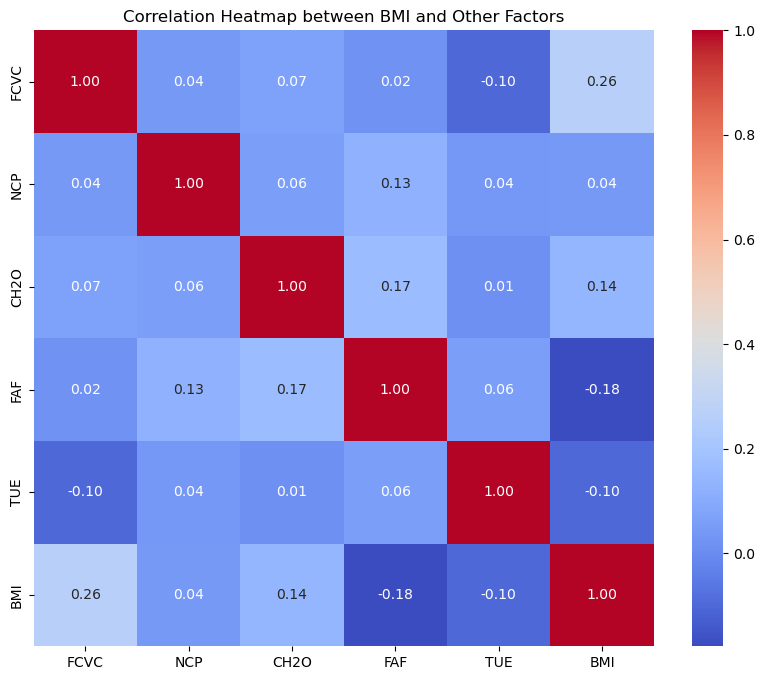

In [8]:
features = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'CALC', 'FAF', 'TUE', 'MTRANS', 'NObeyesdad', 'SCC']
correlation_matrix = data[features + ['BMI']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between BMI and Other Factors')
plt.show()

Use a heat map to visualize the correlation coefficient matrix, where a value closer to 1 or -1 indicates a stronger correlation and a value closer to 0 indicates a weaker correlation

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad            BMI  
0  Public_Transportation        Normal_Weight  243865.264441  
1  Public_Transportation        Normal_Weight  242

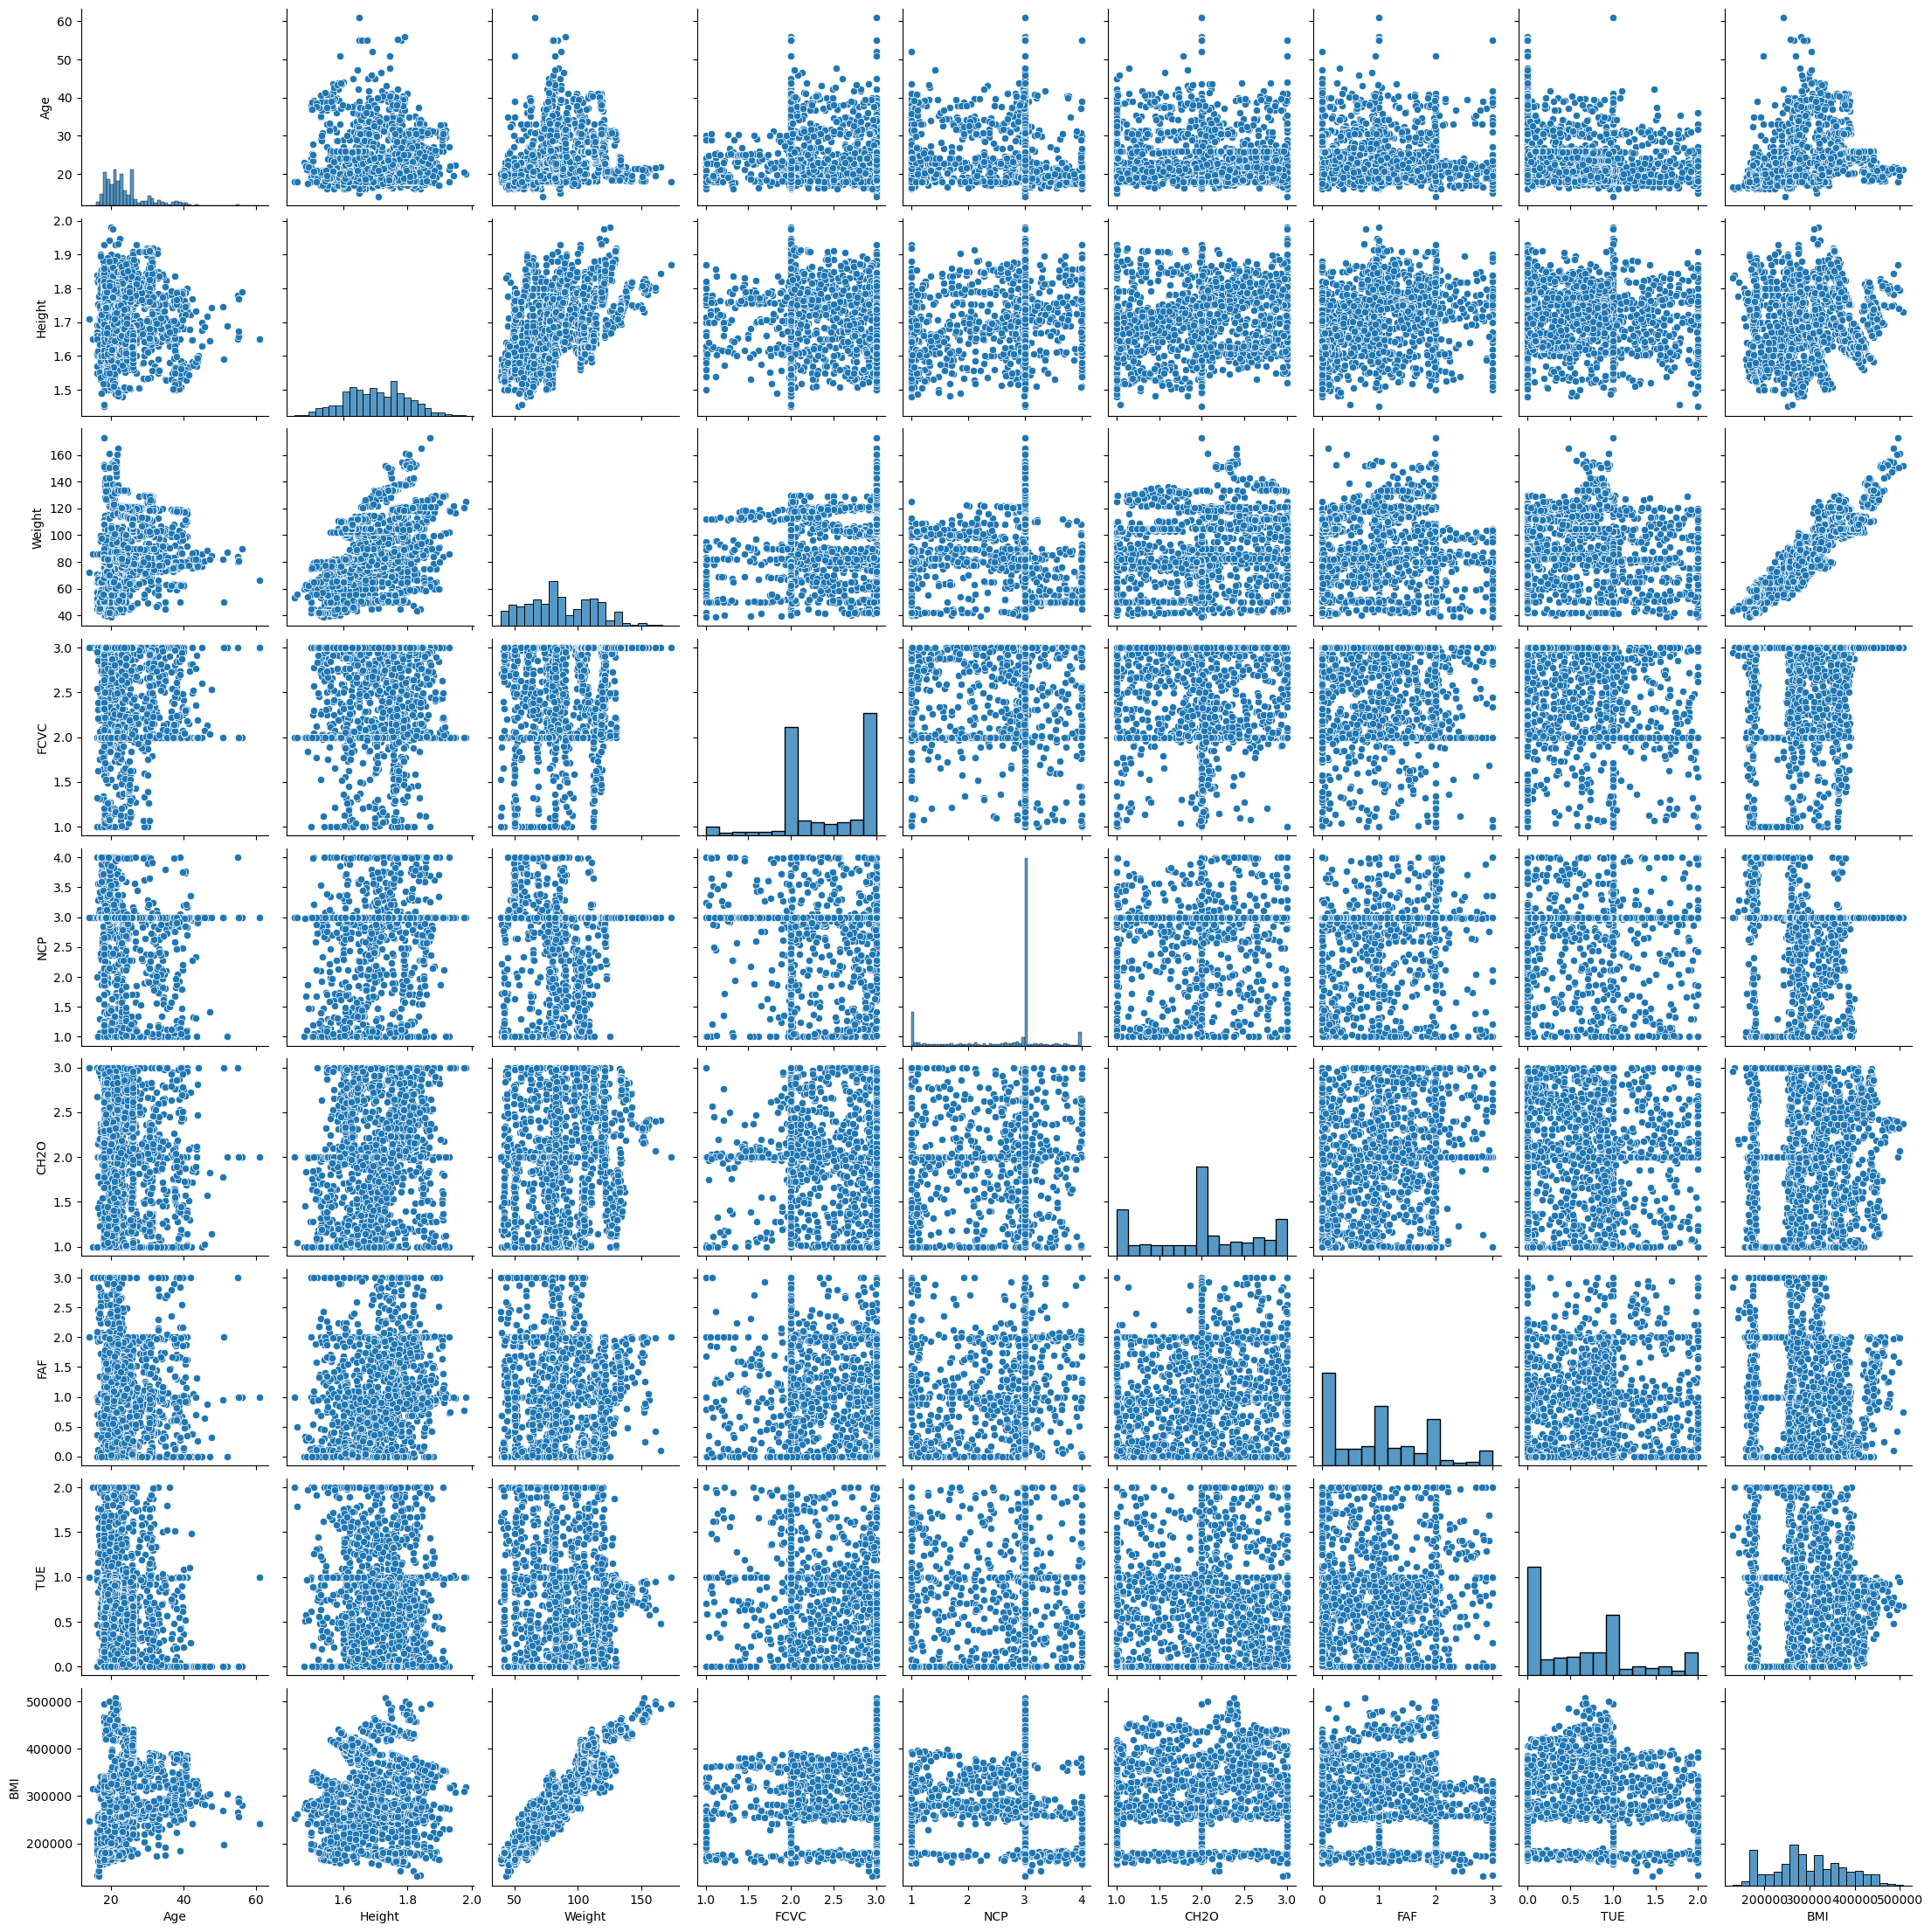

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

print(data.head())
print(data.describe())
sns.pairplot(data)
plt.show()



This module is used to analyze and visualize data. First, use the head() function to print out the first few lines of the dataset in order to see the structure of the data. Then, use the describe() function to generate a statistical summary of the data set to understand the distribution and summary of the data. Finally, the pairplot() function in Seaborn library is used to draw the pairplot between features, which is used to explore the correlation and distribution between features.

### 3. Organise the data for modelling

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = pd.get_dummies(data.drop('NObeyesdad', axis=1))
Y= data['NObeyesdad']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


This module is used to prepare data for modeling. First, the categorical variables are uniquely thermally encoded using the pd.get_dummies() function, and the features are stored in X and the target variables in y. The train_test_split() function is then used to divide the data set into a training set and a test set. Next, a standardized object is created using the StandardScaler() function to standardize the features of the training set and the test set.

### 4. Implement prediction models

In [11]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, Y_train)


LogisticRegression(max_iter=1000)

This module is used to implement predictive models. In this example, a logistic regression model is used. First, create a logistic regression model object using the LogisticRegression() function. The fit() function is then used to fit the model on the normalized training set to learn the relationship between features and targets.

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()



Use linear regression models for data modeling, fitting, and prediction.Linear regression is a simple and intuitive model that is easy to understand and interpret

### 5. Train prediction models

In [13]:
from sklearn import metrics
Y_pred_logistic = logistic_model.predict(X_test_scaled)


This module is used to train predictive models and evaluate their performance. First, the trained model is used to make predictions on the test set, and then the performance of the model is evaluated using confusion matrices and classification reports. The confusion matrix shows the model's predictions, and the classification report provides details on metrics such as the model's accuracy, recall rate, and F1 score.

In [14]:
svc = SVC()
accuracies = cross_val_score(svc, X_train_scaled, Y_train, cv=5)
svc.fit(X_train_scaled, Y_train)

SVC()

SVC  model is constructed and cross-verified and trained.The svc model is suitable for processing data sets with a large number of features, such as text classification and image recognition.

### 6. Test prediction models and show results

In [15]:
print("Confusion Matrix for Logistic Regression:")
print(metrics.confusion_matrix(Y_test, Y_pred_logistic))  
print("\nClassification Report for Logistic Regression:")
print(metrics.classification_report(Y_test, Y_pred_logistic))


Confusion Matrix for Logistic Regression:
[[56  0  0  0  0  0  0]
 [ 8 45  0  0  0  7  2]
 [ 0  0 70  6  0  0  2]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 44  9]
 [ 0  0  1  0  0  4 45]]

Classification Report for Logistic Regression:
                     precision    recall  f1-score   support

Insufficient_Weight       0.88      1.00      0.93        56
      Normal_Weight       0.94      0.73      0.82        62
     Obesity_Type_I       0.96      0.90      0.93        78
    Obesity_Type_II       0.90      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.80      0.79      0.79        56
Overweight_Level_II       0.78      0.90      0.83        50

           accuracy                           0.90       423
          macro avg       0.89      0.90      0.89       423
       weighted avg       0.90      0.90      0.89       423



By printing confusion matrices and classification reports, you can fully evaluate the functionality of the logistic regression model on the test set, including the prediction accuracy for each category and the performance of the model as a whole.

In [16]:
print("Average Train Score:", np.mean(accuracies))
print("Test Score:", svc.score(X_test_scaled, Y_test))
Y_prediction = svc.predict(X_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, Y_prediction))
print("\nClassification Report:")
print(classification_report(Y_test, Y_prediction))

Average Train Score: 0.8714378522641477
Test Score: 0.8723404255319149
Confusion Matrix:
[[52  4  0  0  0  0  0]
 [ 3 49  1  0  0  6  3]
 [ 0  2 70  4  0  1  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0 13  0  0  0 39  4]
 [ 0  3  0  0  0  8 39]]

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94        56
      Normal_Weight       0.69      0.79      0.74        62
     Obesity_Type_I       0.97      0.90      0.93        78
    Obesity_Type_II       0.93      0.98      0.96        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.72      0.70      0.71        56
Overweight_Level_II       0.83      0.78      0.80        50

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.88      0.87      0.87       423



Print cross-validation average accuracy, test set accuracy, classification report, confusion matrix

### 7. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

By comparing the results of the two models, we can find that the accuracy of the logistic regression model is 0.90, while the accuracy of the SVC is 0.87. Logistic regression models have slightly higher accuracy, accuracy, recall and F1 scores than SVC in several categories. Therefore, based on the results provided, we can conclude that logistic regression models perform better in this task and are more suitable for analyzing the data in the task

### 8. Describe appropriate recommendations

According to the statistical results, we found the strongest positive correlation between the Frequency of consumption of vegetables (FCVC) and bmi. Therefore, obese patients should eat more vegetables to lose weight. The government can encourage residents to increase their intake of vegetables by providing subsidies, thus reducing obesity.

### 9. Reflect on what you have learned by completing this assignment

In this work, we found that the data processing results of different models are different, which is because different models have different training methods and algorithm applications. So we have to learn to use appropriate training and prediction models to train and predict different data. At the same time, before training different models, statistics and preprocessing of data are also indispensable.

### 10. References

1.cross_val_score--scikit-learn: Model Evaluation: Cross-Validation
2.LogisticRegression - scikit-learn documentation
3.heatmap-seaborn.heatmap documentation